In [4]:
!pip install -q towhee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.9 MB/s eta 0:00:00


In [5]:
from towhee.dc2 import pipe
from towhee.dc2 import ops
from towhee.datacollection import DataCollection

In [ ]:
#Atleast one input and one output

p = (
	pipe.input('num')
		.output('num')
)

In [ ]:
res = p(1)
DataCollection(res).show()

In [ ]:
res2 = p([1,2,3,4])

In [ ]:
DataCollection(res2).show()

In [ ]:
#Map node get the specified data by input_schema from each element as input, apply it to a function, 
#then specify the schema of output as output_schema.

#map(input_schema, output_schema, fn, config=None)

p2 = (
    pipe.input('num')
      .map('num','num_out',lambda x: x + 2)
      .output('num_out')
)

In [ ]:
res2 = p2(2)
DataCollection(res2).show()

In [ ]:
#flat_map(input_schema, output_schema, fn, config=None)
p3 = (
    pipe.input('num_in')
      .flat_map('num_in','num_out', lambda x: [i * 2 for i in x])
      .output('num_in','num_out')
)

In [ ]:
res3 = p3([1,5,8,9])
DataCollection(res3).show()

In [ ]:
#filter(input_schema, output_schema, 
#        filter_columns, fn, config=None)

pf = (
    pipe.input('num')
      .flat_map('num', 'num_o', lambda x: [i * 2 for i in x])
      .filter(input_schema='num',
              output_schema='num_f',
              filter_columns='num',
              fn=lambda z: z > 10)
      .output('num_f')
)

In [ ]:
res4  = pf([11,12,1,17])
DataCollection(res4).show()

In [ ]:
#window(input_schema, output_schema, size, step, fn, config=None)

p = (
	pipe.input('num')
		.flat_map('num', 'num', lambda x: [i * 2 for i in x])
		.window('num', 'nums', 3, 2, lambda x: [i * 2 for i in x])
		.output('num', 'nums')
)

res = p([1, 2, 3, 4,5,7,8,9,15,75])
DataCollection(res).show()

In [ ]:
#time_window(input_schema, output_schema, timestamp_col, size, step, fn, config=None)

p = (
	pipe.input('num', 'timestamp')
		.flat_map(('num', 'timestamp'), 
            ('num_col', 'timestamp_col'), 
            lambda x,y: [(i, j) for i, j in zip(x, y)])
		.time_window('num_col', 'nums', 'timestamp_col',
               2, 1, 
               lambda x: x)
		.output('num_col', 'timestamp_col', 'nums')
)

res = p([1, 2, 3, 4, 5], [0, 1000, 2000, 4000, 5000])
DataCollection(res).show()

In [ ]:
#window_all(input_schema, output_schema, fn, config=None)

p = (
	pipe.input('num')
		.flat_map('num', 'num', lambda x: [i * 2 for i in x])
		.window_all('num', 'nums', lambda x: [i * 2 for i in x])
		.output('num', 'nums')
)

res = p([1, 2, 3, 4])
DataCollection(res).show()

In [ ]:
pipe0 = (
	pipe.input('a', 'b', 'c')
)

pipe1 = (
	pipe0.map('a', 'd', lambda x: x+1)
)

pipe2 = (
	pipe0.map(('b', 'c'), 'e', lambda x, y: x - y)
)

pipe3 = pipe2.concat(pipe1).output('a', 'b', 'c', 'd', 'e')

res = pipe3(1, 2, 3)

DataCollection(res).show()

In [ ]:
op = ops.image_decode.cv2()
img = op('/content/rabbit-pull.jpg')

Cloning the repo: image-decode/cv2... Be patient and waiting printing 'Successfully'.
Successfully clone the repo: image-decode/cv2.


In [ ]:
img


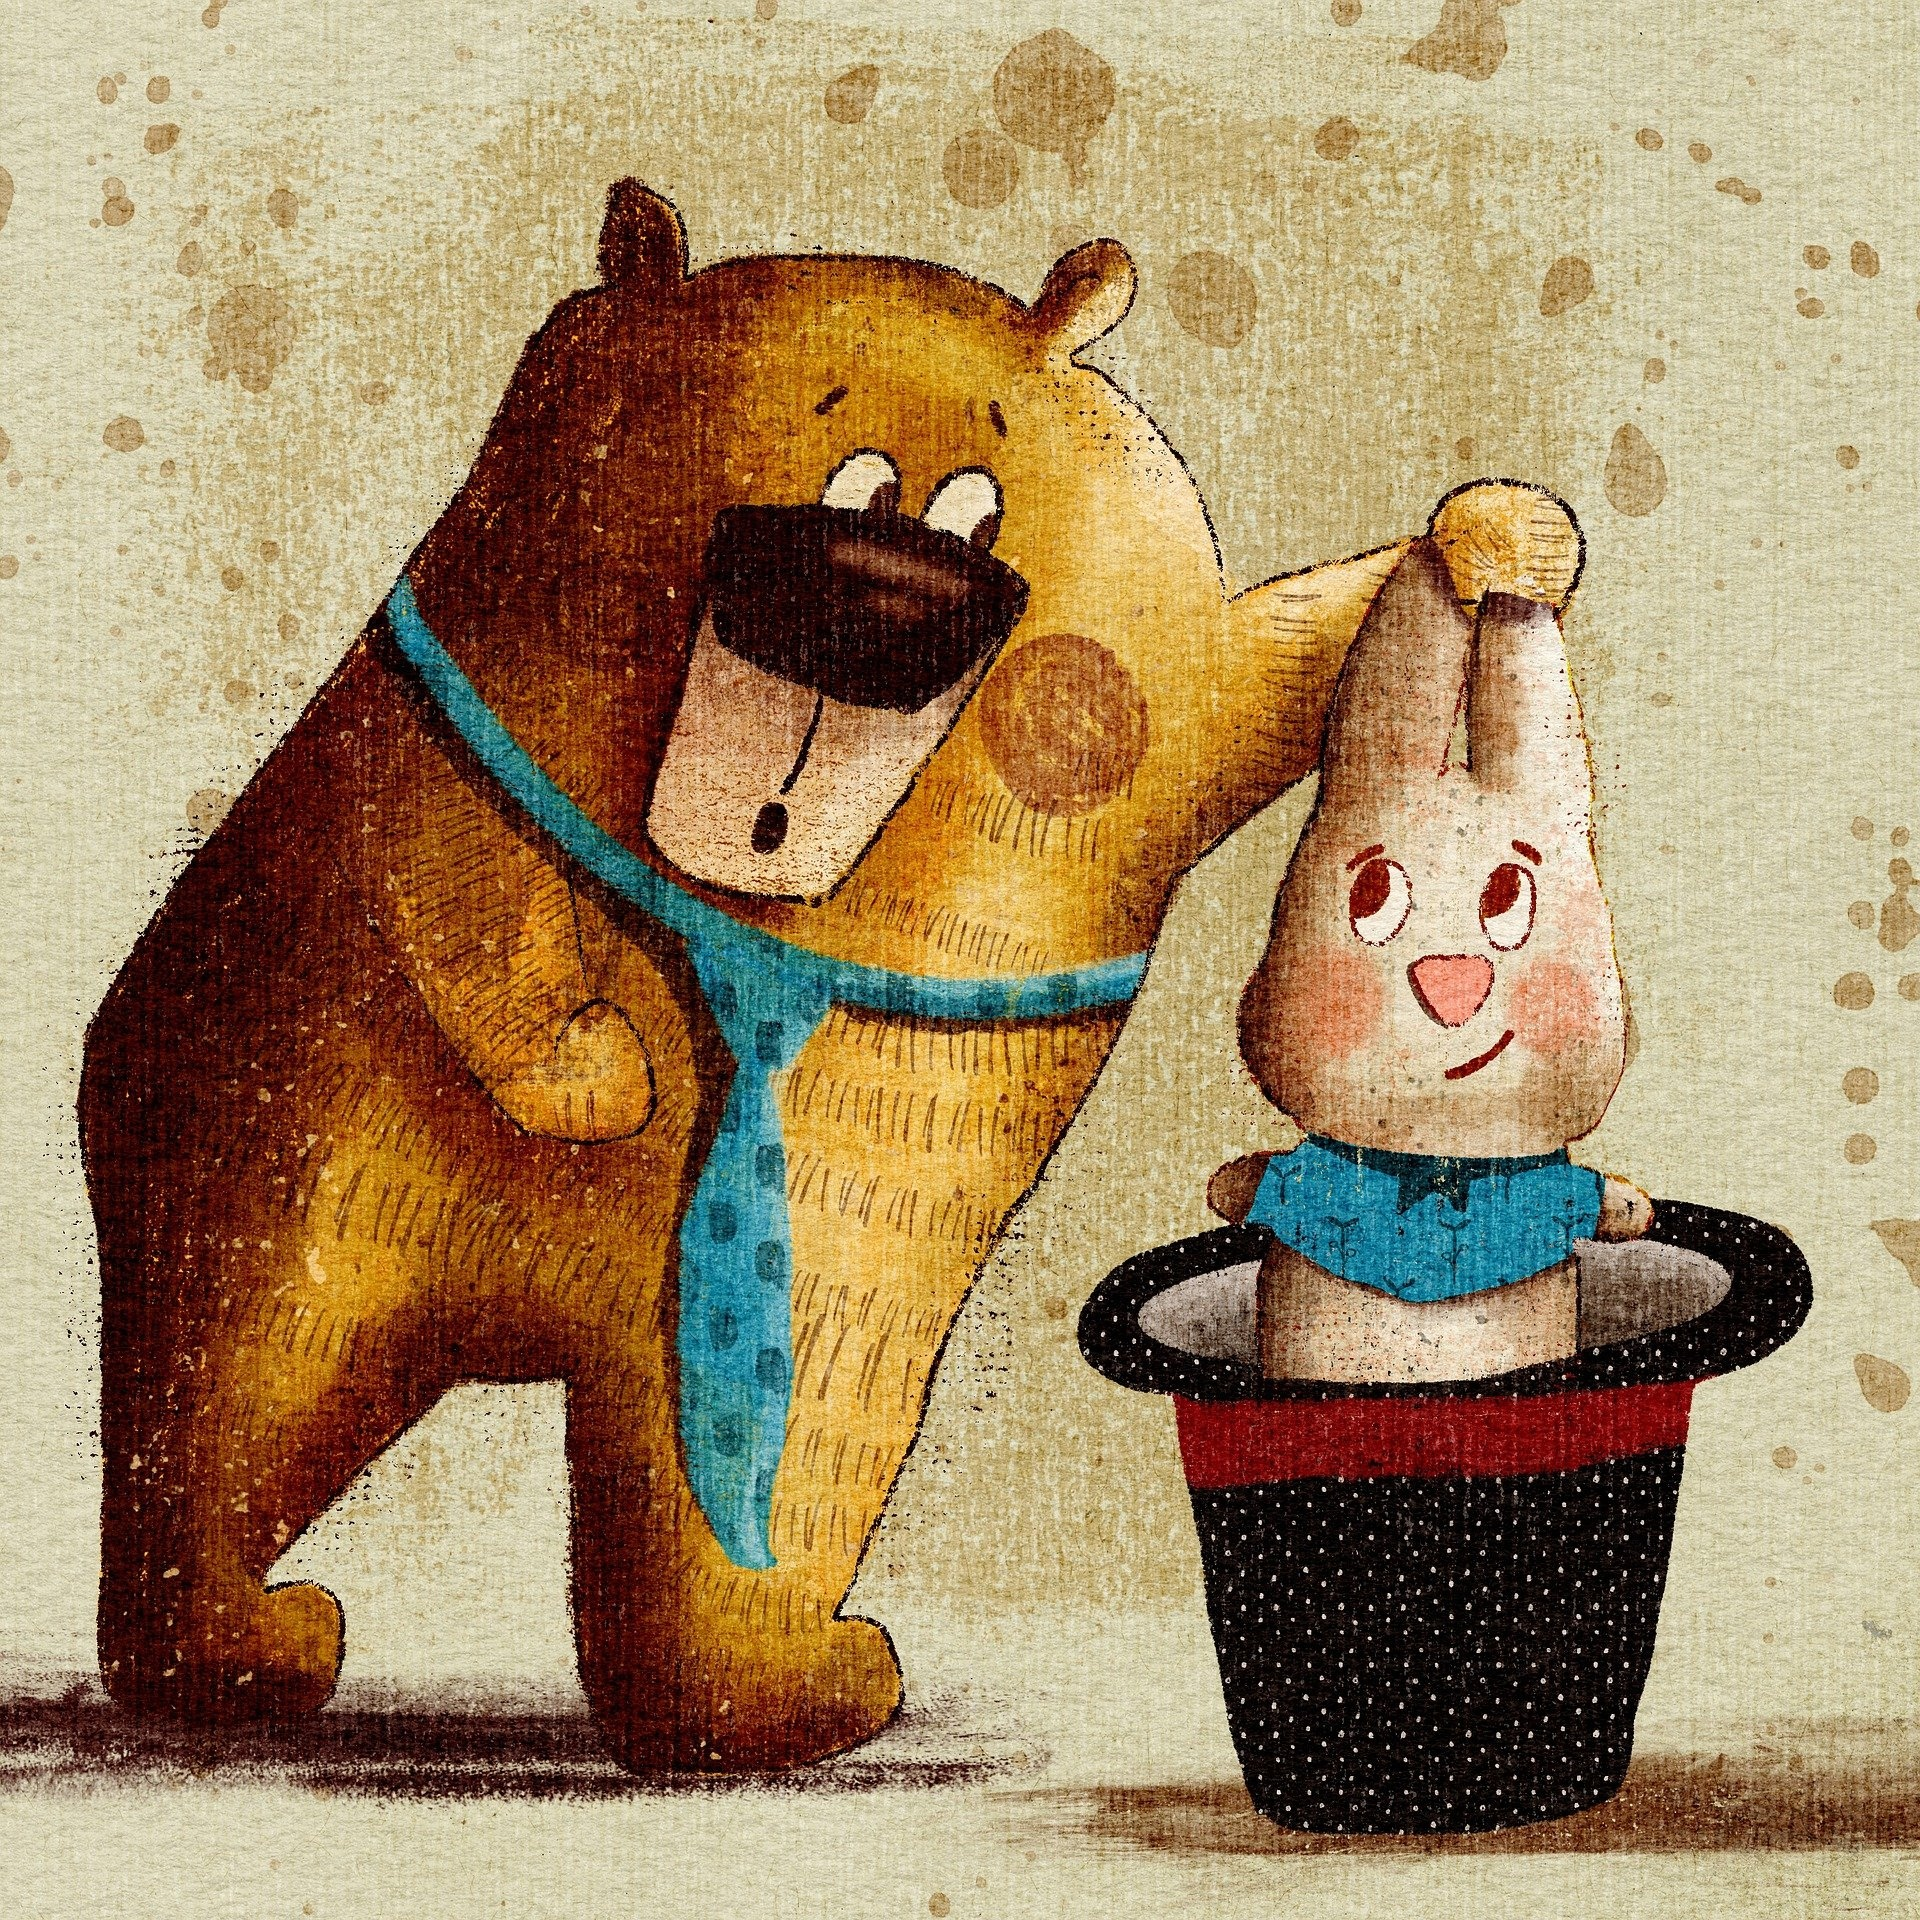

In [ ]:
p = (
	pipe.input('nam')
		.map('nam', 'image', ops.image_decode.cv2())
		.output('nam', 'image')
)
DataCollection(p('/content/rabbit-pull.jpg')).show()

Cloning the repo: image-embedding/timm... Be patient and waiting printing 'Successfully'.
Successfully clone the repo: image-embedding/timm.


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth



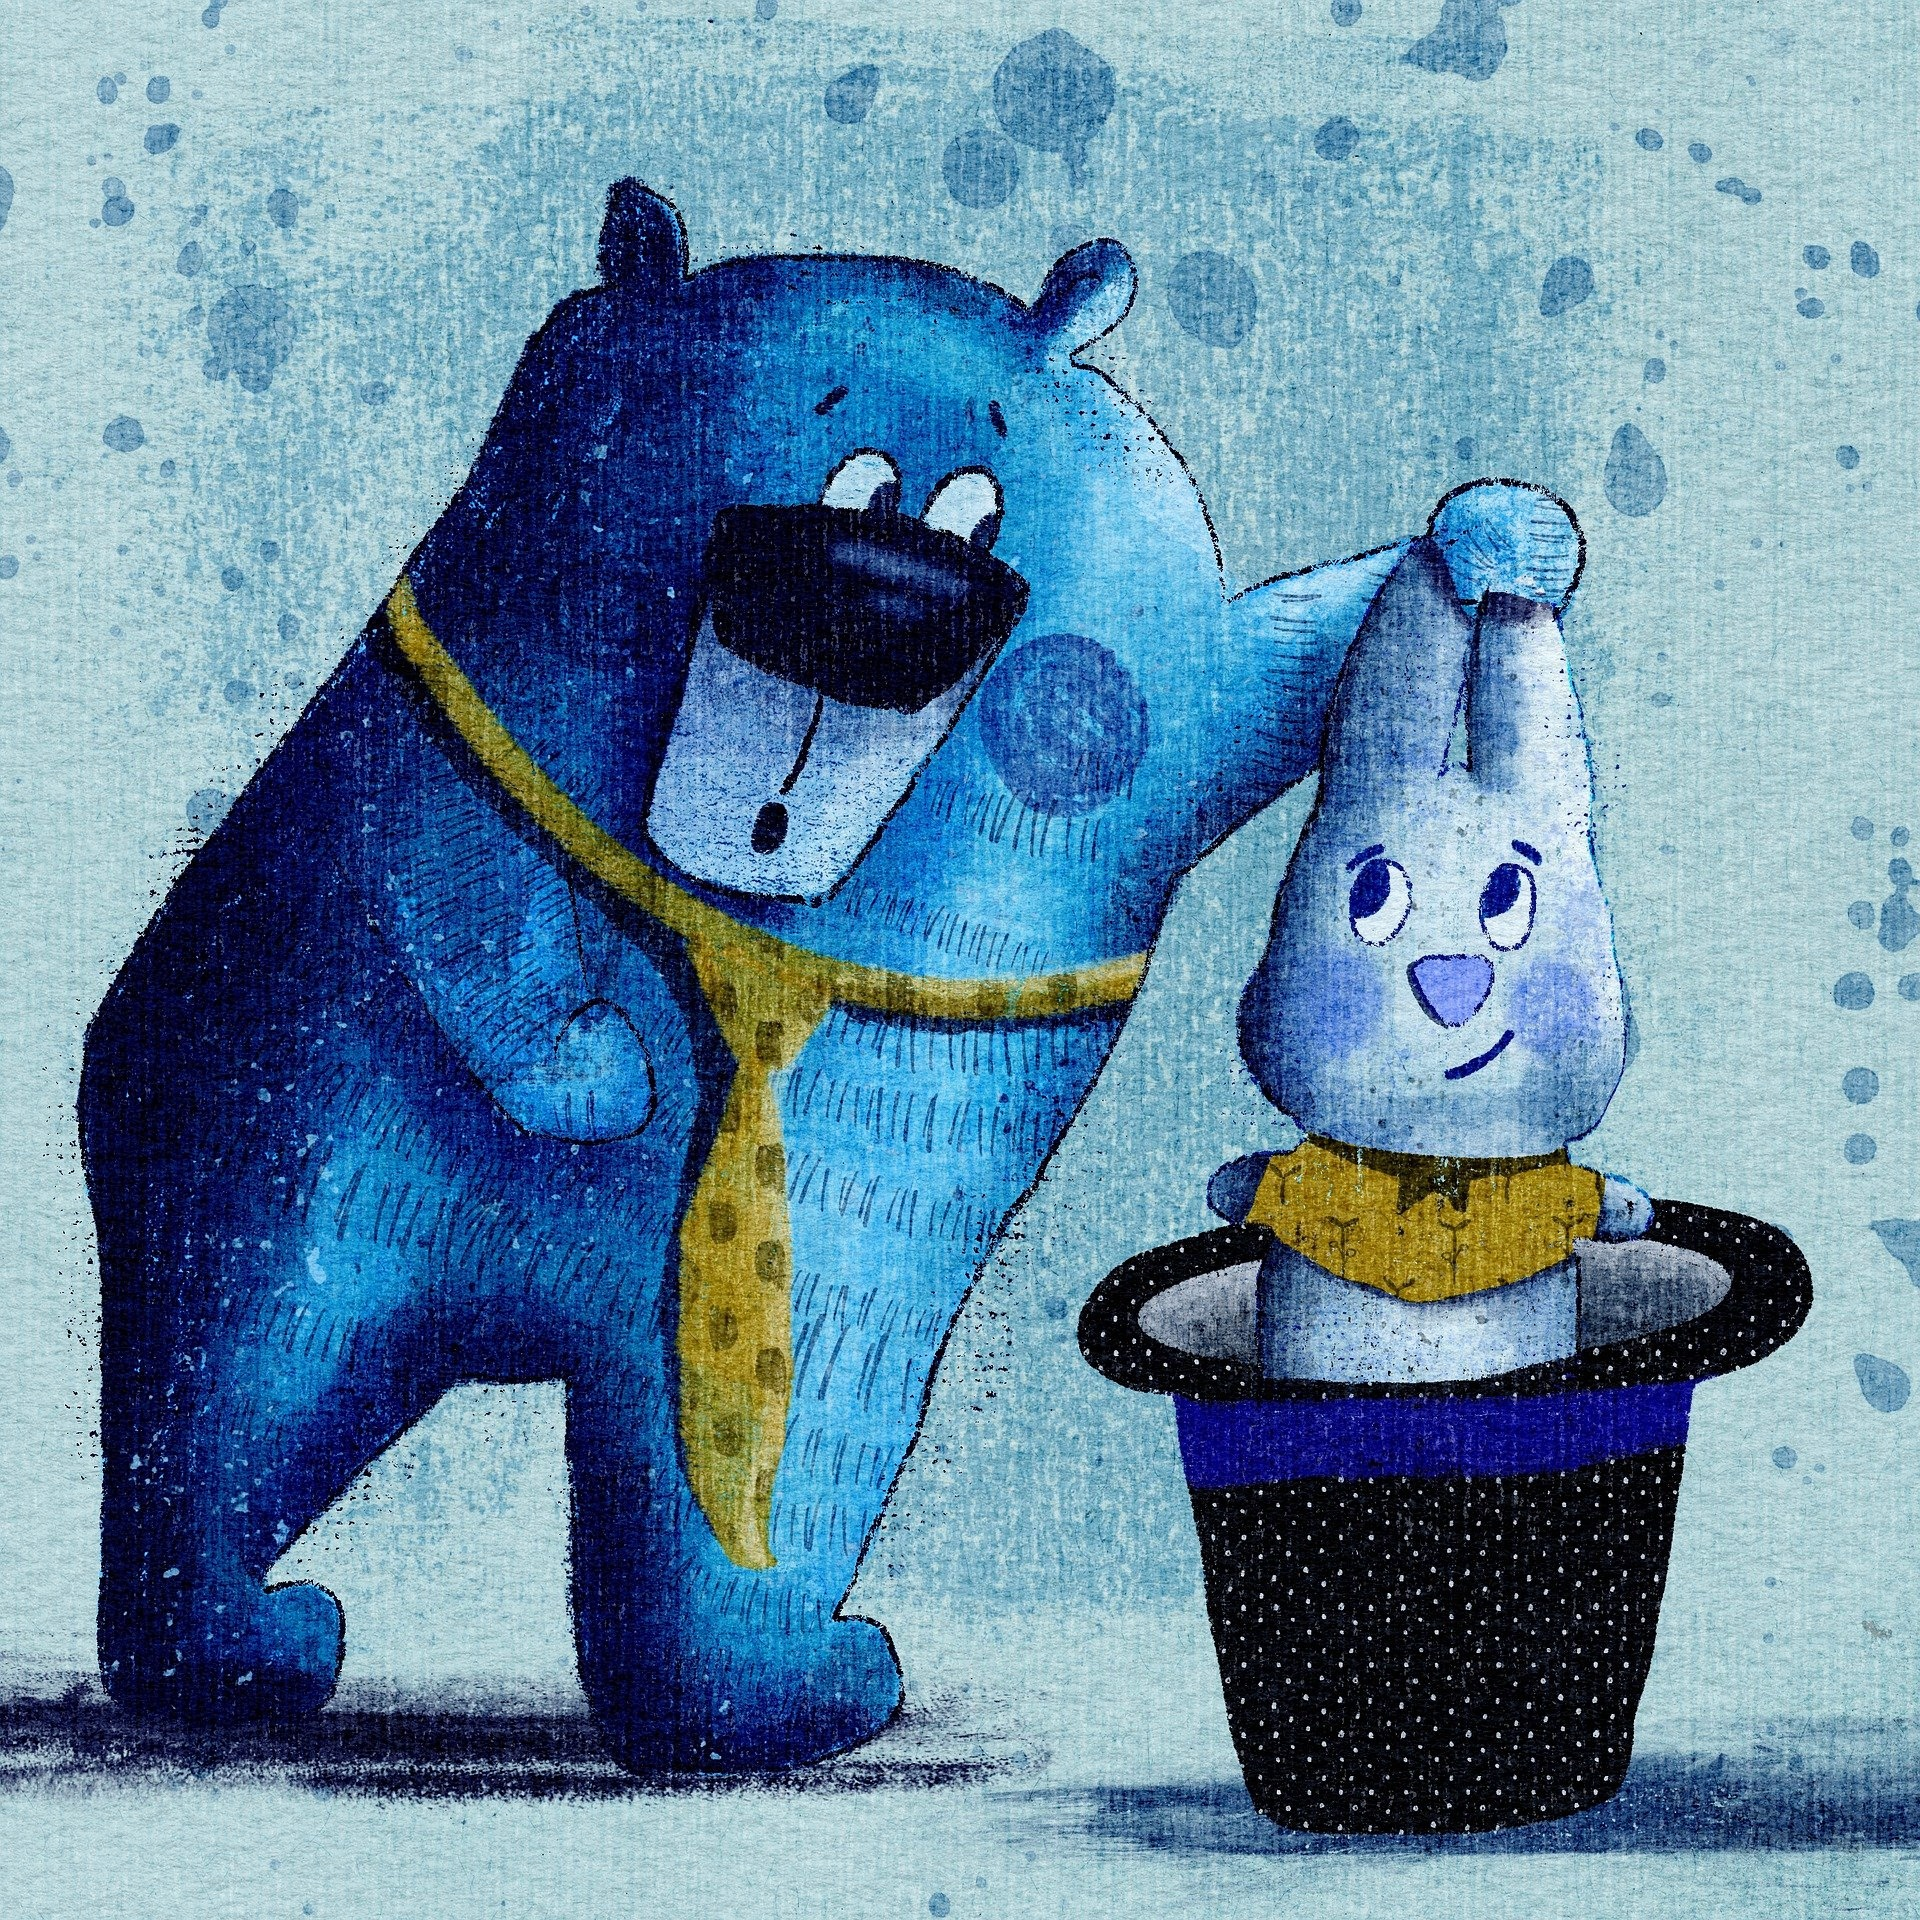
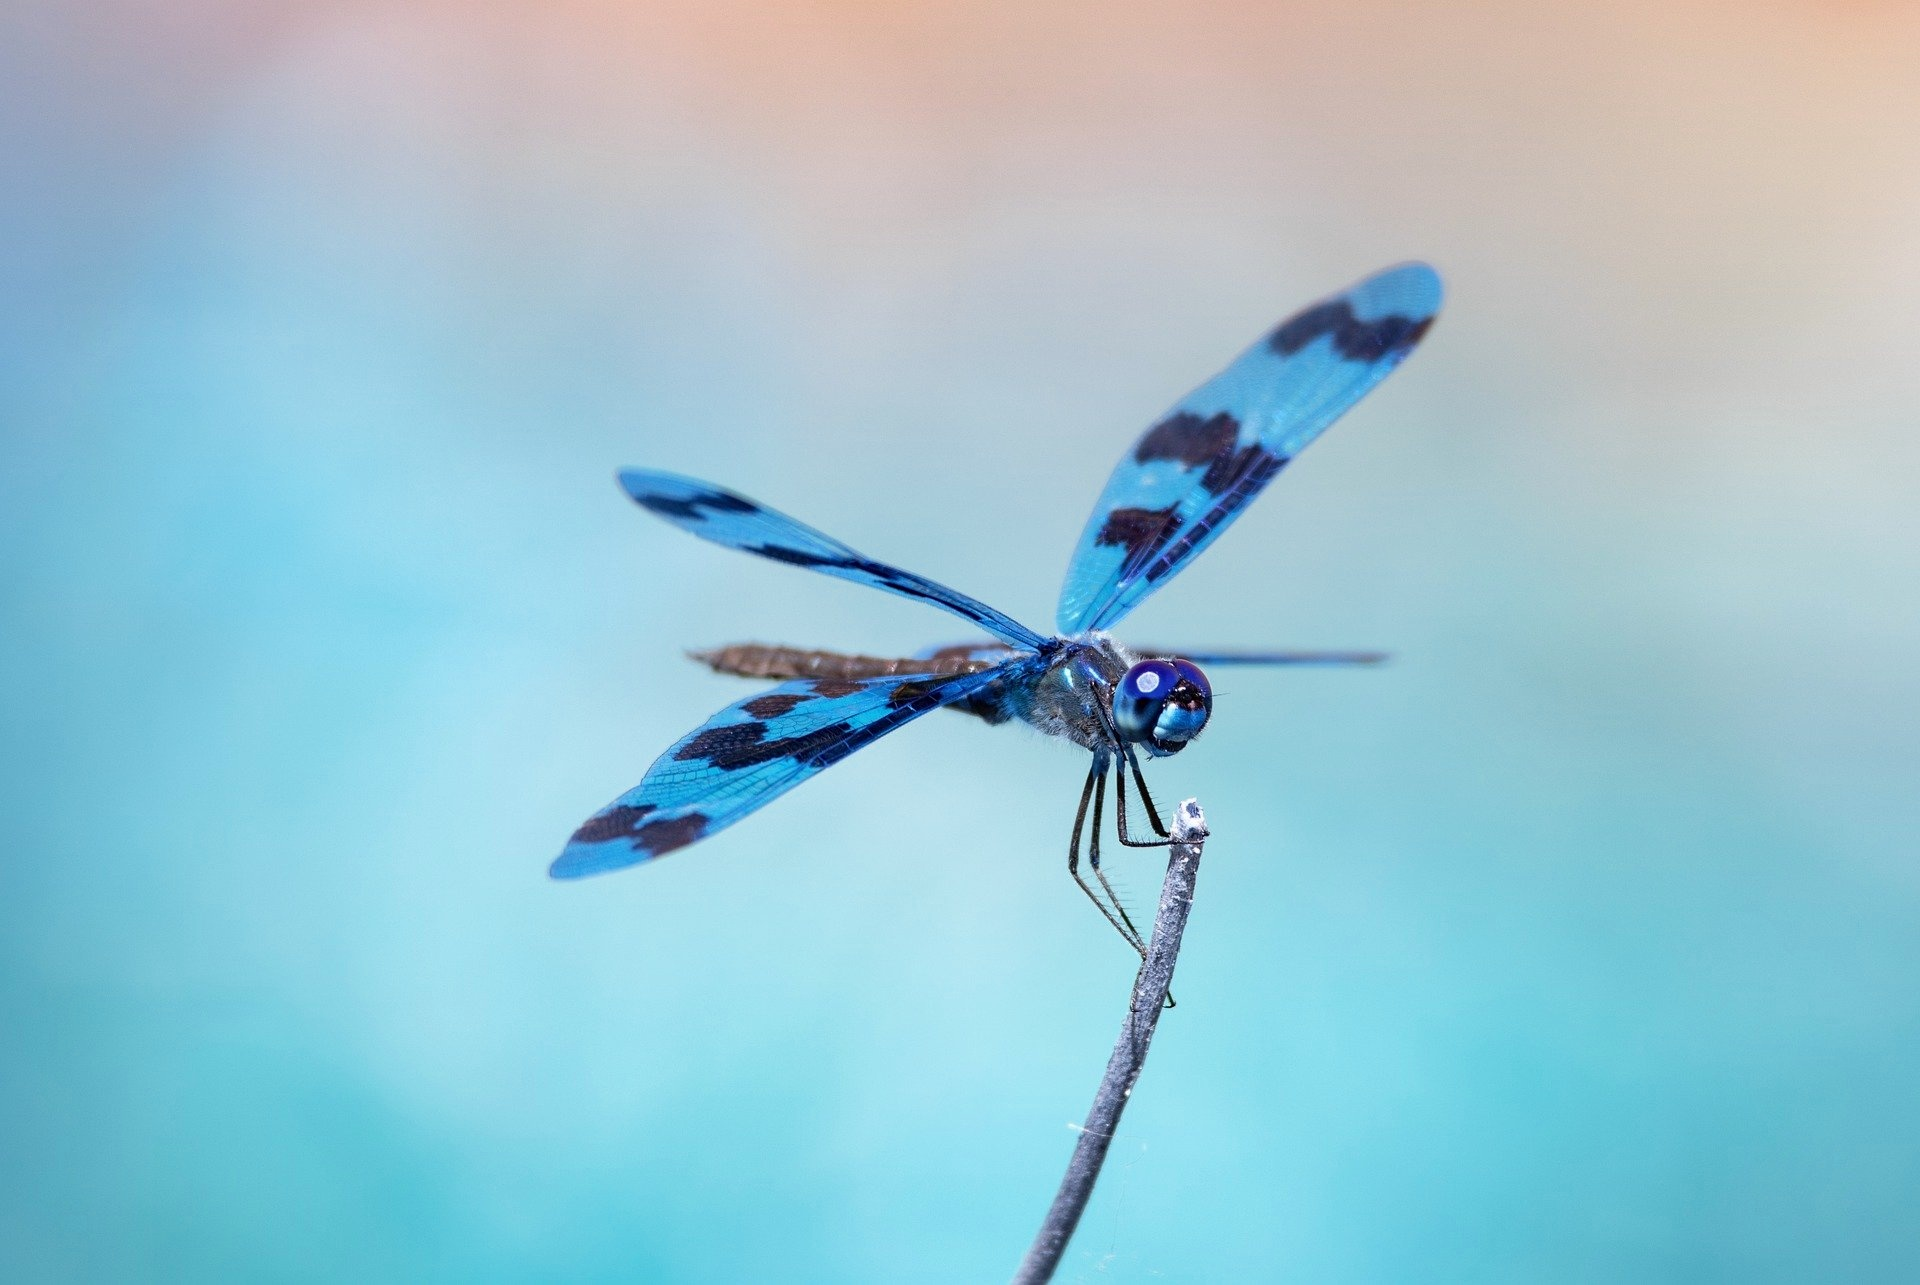
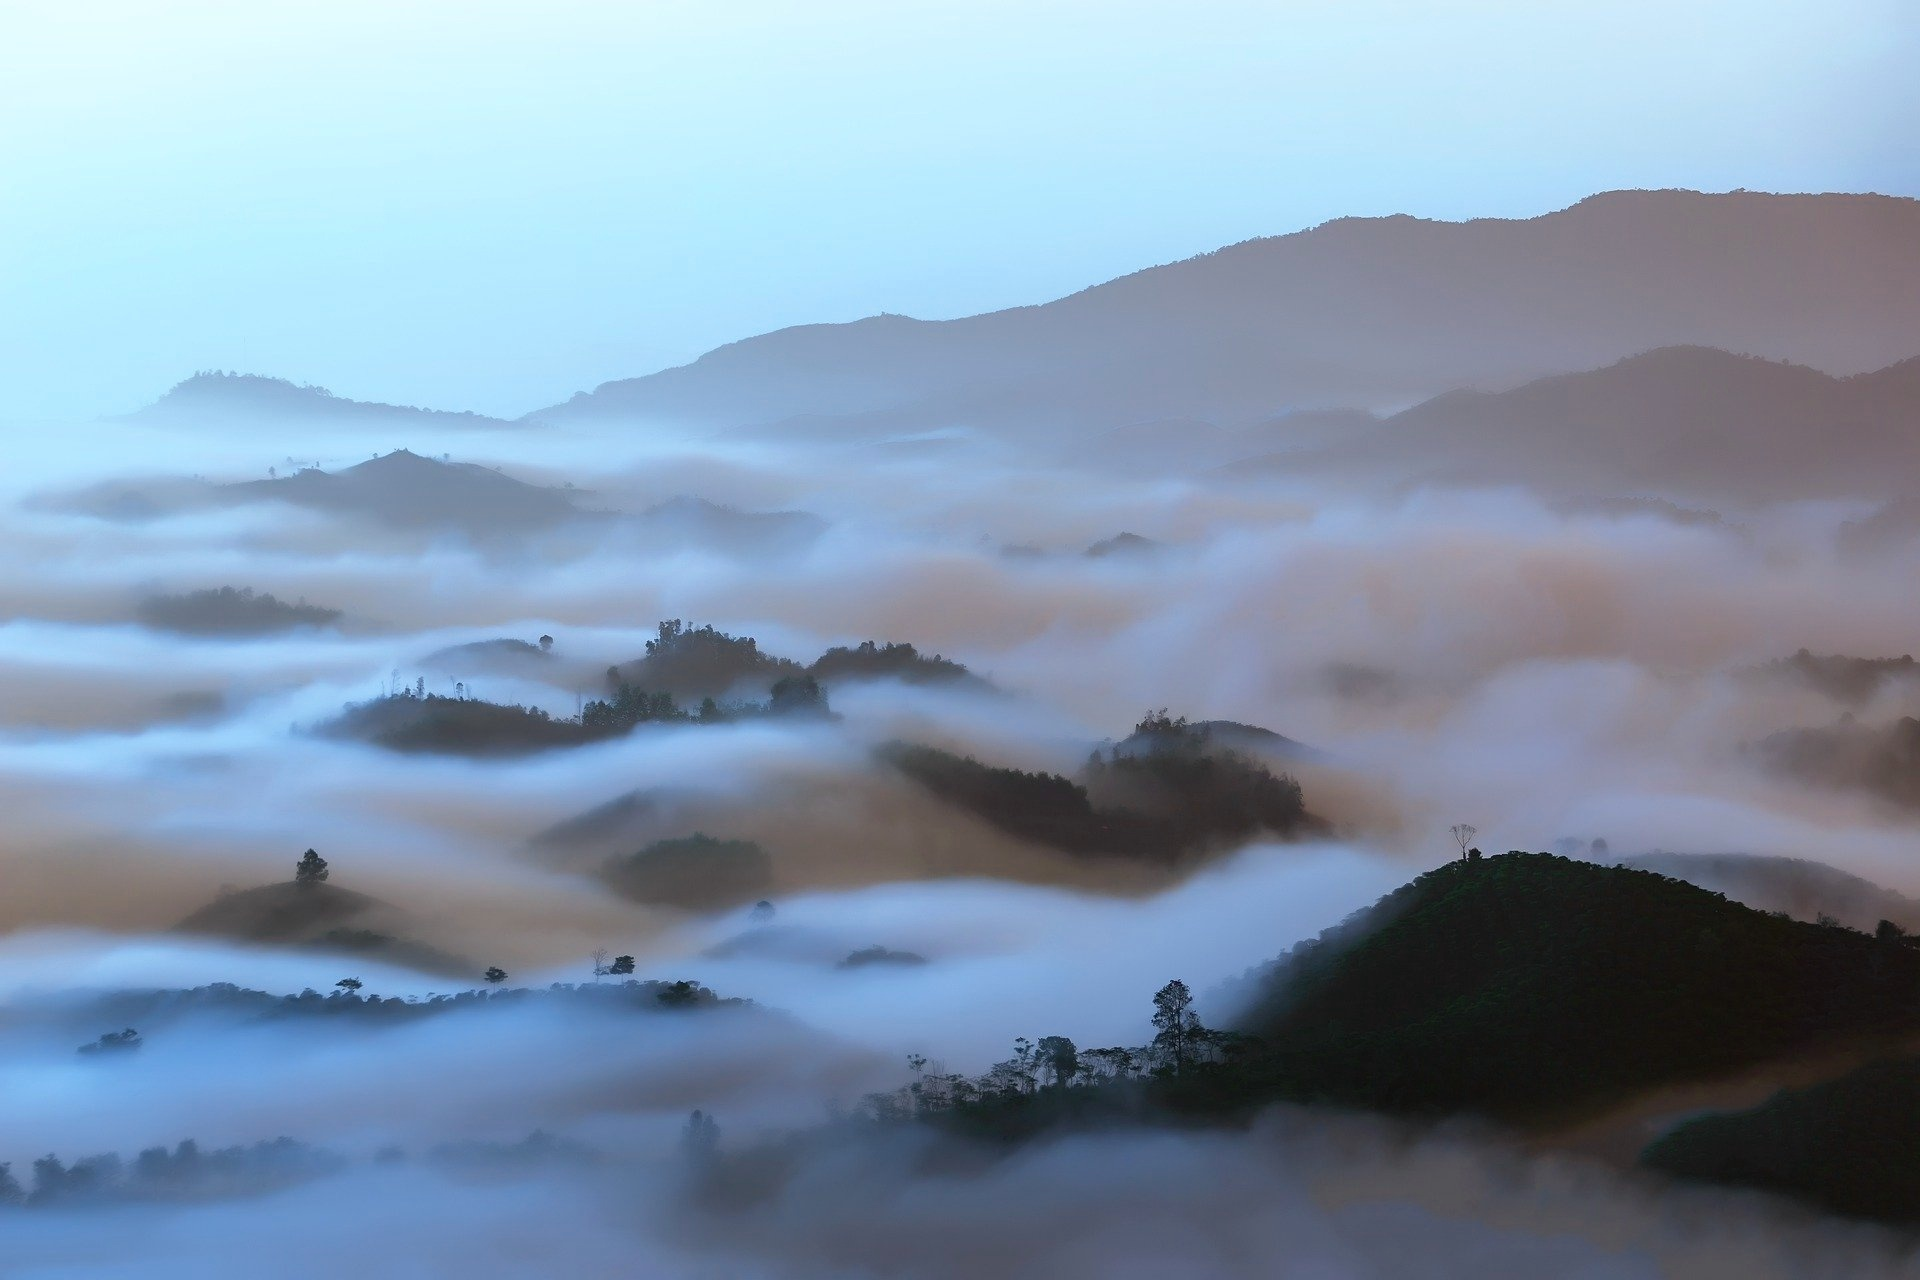

In [ ]:
emb_pipe = (
	pipe.input('urls')
		.flat_map('urls', 'urls', lambda x: x)
		.map('urls', 'images', ops.image_decode.cv2('rgb'))
		.map('images', 'embeddings', ops.image_embedding.timm(model_name='resnet50'))
		.output('urls', 'images', 'embeddings')
)

res = emb_pipe(['/content/rabbit-pull.jpg',
                '/content/hd-wallpaper-df.jpg', 
                '/content/cloud-dawn.jpg'])
DataCollection(res).show()

In [1]:
import pandas as pd

In [3]:
img_df = pd.DataFrame({'urls':['/content/rabbit-pull.jpg',
                '/content/hd-wallpaper-df.jpg', 
                '/content/cloud-dawn.jpg']})

In [6]:
#from towhee.dc2 import ops, pipe, DataCollection

test_pipe = (pipe.input('df')
                   .flat_map('df', 'data', lambda df: df.values.tolist())
                   .output('data'))

In [8]:
data_dc = test_pipe(img_df)
DataCollection(data_dc).show()